<a href="https://colab.research.google.com/github/virat709/EDITH/blob/main/Netflix_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [ ]:
# Load the dataset
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [46]:

# 1. DATA CLEANING

def clean_data(df):
    """Clean and preprocess Netflix dataset"""

    # Create copy to avoid modifying original
    clean_df = df.copy()

    # Handle missing values
    clean_df['director'].fillna('Unknown', inplace=True)
    clean_df['cast'].fillna('Unknown', inplace=True)
    clean_df['country'].fillna('Unknown', inplace=True)
    clean_df['rating'].fillna(clean_df['rating'].mode()[0], inplace=True)

    # Convert date columns to datetime
    clean_df['date_added'] = pd.to_datetime(
        clean_df['date_added'].str.strip(),
        errors='coerce',
        format='%B %d, %Y'
    )

    # Extract year added and month added
    clean_df['year_added'] = clean_df['date_added'].dt.year
    clean_df['month_added'] = clean_df['date_added'].dt.month_name()

    # Split genres and create first genre column
    clean_df['first_genre'] = clean_df['listed_in'].apply(
        lambda x: x.split(',')[0].strip() if isinstance(x, str) else 'Unknown'
    )

    # Create content age
    current_year = datetime.now().year
    clean_df['content_age'] = current_year - clean_df['release_year']

    # Drop duplicates
    clean_df.drop_duplicates(subset=['title', 'type', 'release_year'], inplace=True)

    return clean_df

cleaned_df = clean_data(df)

In [ ]:



# Content type distribution
print("2")
type_dist = cleaned_df['type'].value_counts(normalize=True)
print(f"\nContent Type Distribution:\n{type_dist}")




2

Content Type Distribution:
type
Movie      0.696151
TV Show    0.303849
Name: proportion, dtype: float64


In [ ]:

# Basic info
print("1")
print(f"\nDataset Shape: {cleaned_df.shape}")
print(f"\nMissing Values Count:")
print(cleaned_df.isnull().sum()[cleaned_df.isnull().sum() > 0])

1

Dataset Shape: (8807, 16)

Missing Values Count:
date_added     10
duration        3
year_added     10
month_added    10
dtype: int64


In [ ]:

# Top production countries
print("3")
top_countries = cleaned_df['country'].apply(
    lambda x: x.split(',')[0].strip() if x != 'Unknown' else 'Unknown'
).value_counts().head(10)
print(f"\nTop 10 Production Countries:\n{top_countries}")

3

Top 10 Production Countries:
country
United States     3211
India             1008
Unknown            831
United Kingdom     628
Canada             271
Japan              259
France             212
South Korea        211
Spain              181
Mexico             134
Name: count, dtype: int64


In [ ]:
# Release year trend
recent_content = cleaned_df[cleaned_df['release_year'] > 2010]
yearly_content = recent_content.groupby('release_year')['type'].value_counts().unstack()
yearly_content = yearly_content.fillna(0).astype(int)


/tmp/ipython-input-40-2318246884.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=cleaned_df, palette=netflix_colors)


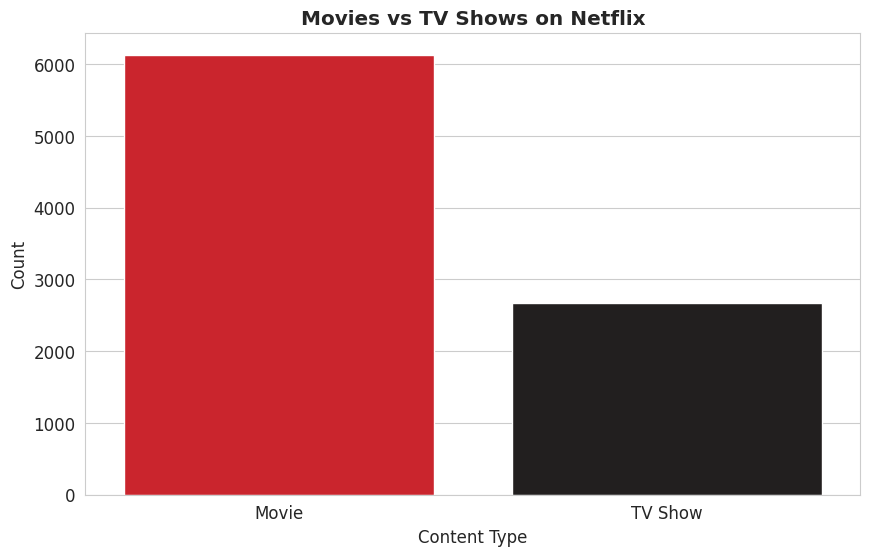

In [ ]:
# 3. DATA VISUALIZATION


# Color palette
netflix_colors = ['#E50914', '#221F1F']

# Plot 1: Content Type Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=cleaned_df, palette=netflix_colors)
plt.title('Movies vs TV Shows on Netflix', fontweight='bold')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.savefig('content_type_distribution.png', bbox_inches='tight')
plt.show()


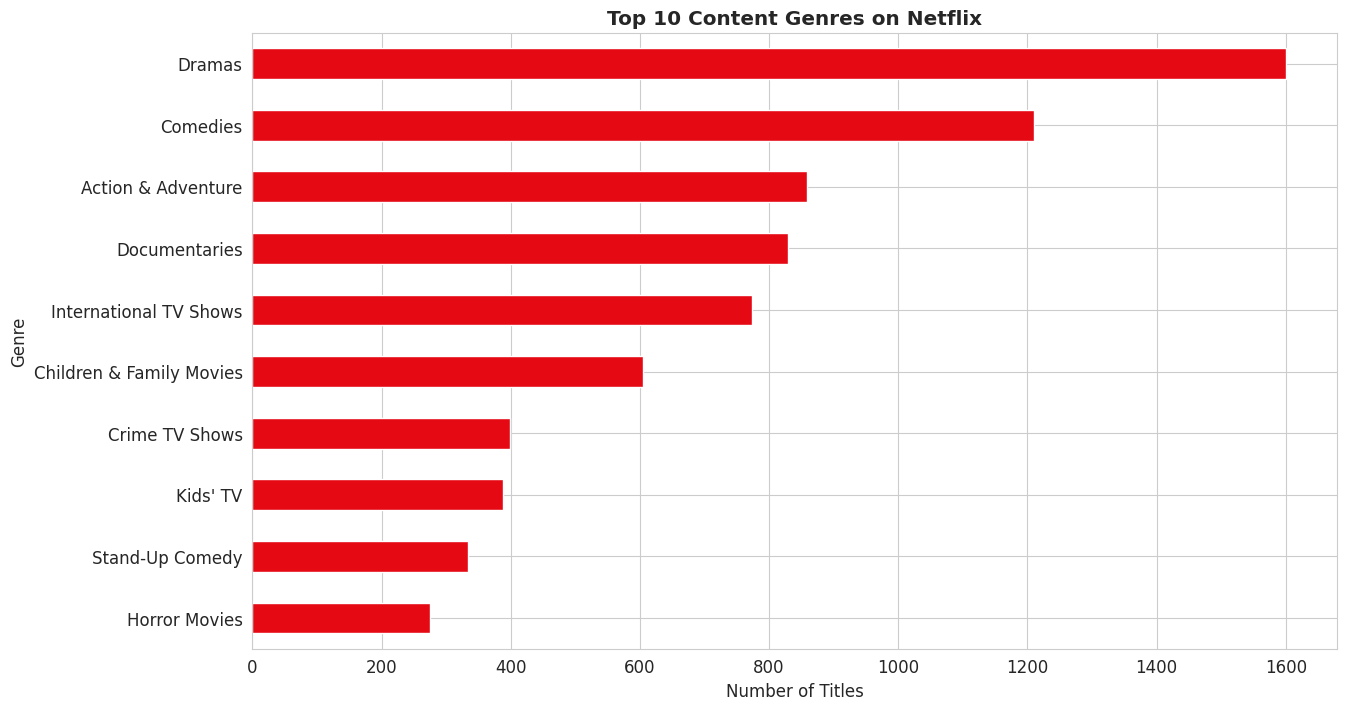

In [ ]:
# Plot 2: Top Genres
plt.figure(figsize=(14, 8))
cleaned_df['first_genre'].value_counts().nlargest(10).plot(
    kind='barh', color=netflix_colors[0]
)
plt.title('Top 10 Content Genres on Netflix', fontweight='bold')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.gca().invert_yaxis()
plt.savefig('top_genres.png', bbox_inches='tight')
plt.show()


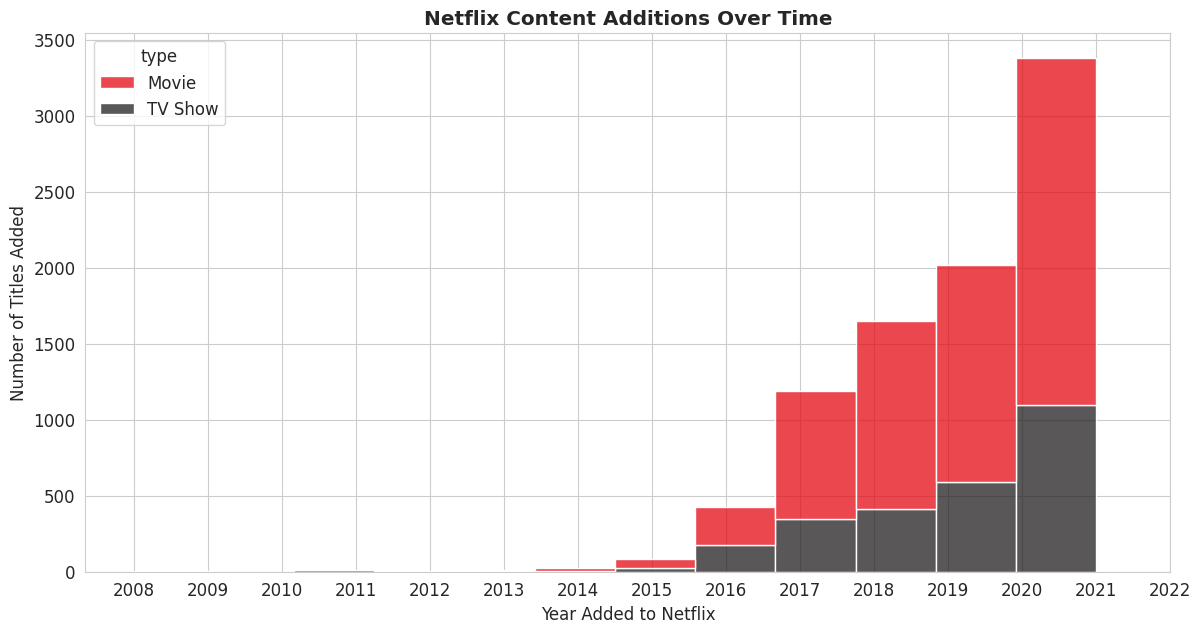

In [47]:
# Plot 3: Content Added Over Time
plt.figure(figsize=(14, 7))
content_added = cleaned_df.dropna(subset=['year_added'])
sns.histplot(data=content_added, x='year_added', hue='type',
             multiple='stack', palette=netflix_colors, bins=12)
plt.title('Netflix Content Additions Over Time', fontweight='bold')
plt.xlabel('Year Added to Netflix')
plt.ylabel('Number of Titles Added')
plt.xticks(range(2008, 2023))
plt.savefig('content_added_trend.png', bbox_inches='tight')
plt.show()


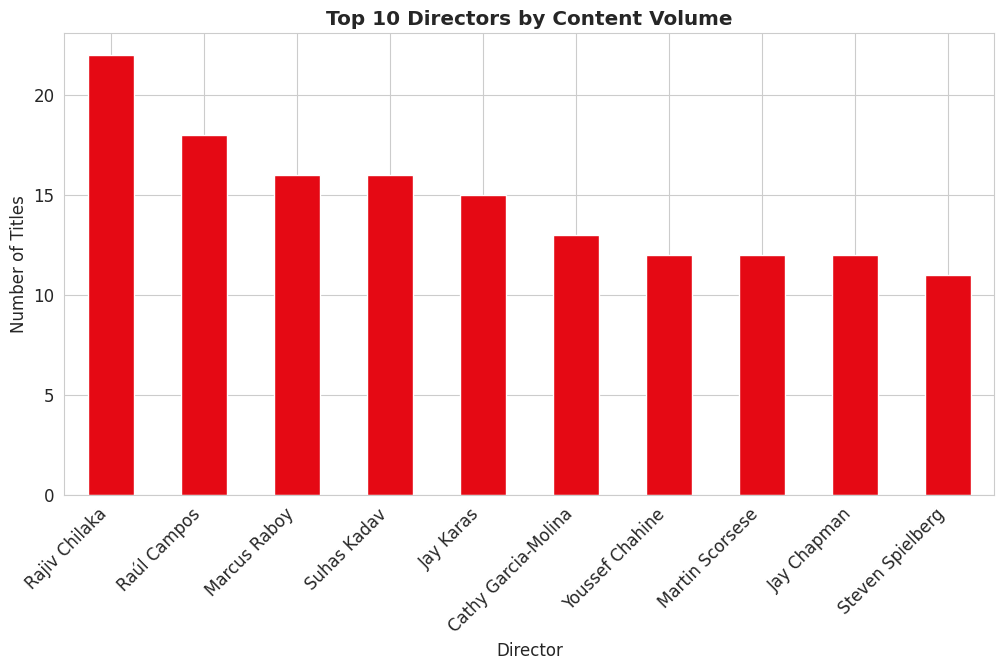

In [ ]:
# Plot 4: Top Directors
top_directors = cleaned_df[cleaned_df['director'] != 'Unknown']
top_directors = top_directors['director'].apply(
    lambda x: x.split(',')[0].strip()
).value_counts().head(10)

plt.figure(figsize=(12, 6))
top_directors.plot(kind='bar', color=netflix_colors[0])
plt.title('Top 10 Directors by Content Volume', fontweight='bold')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.savefig('top_directors.png', bbox_inches='tight')
plt.show()


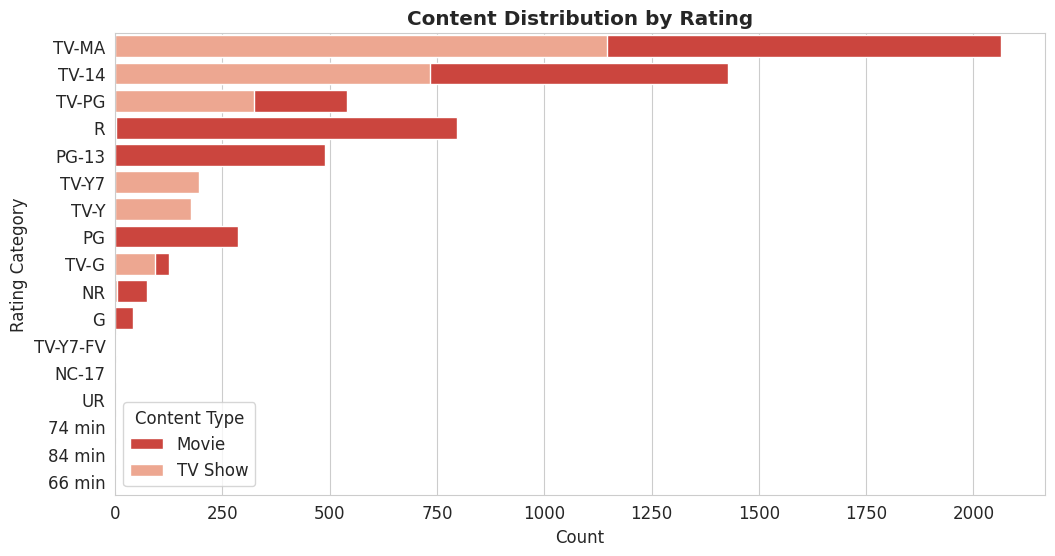

In [48]:
# Plot 5: Content by Rating
plt.figure(figsize=(12, 6))
rating_order = cleaned_df['rating'].value_counts().index
sns.countplot(y='rating', data=cleaned_df, order=rating_order,
              palette='Reds_r', hue='type', dodge=False)
plt.title('Content Distribution by Rating', fontweight='bold')
plt.xlabel('Count')
plt.ylabel('Rating Category')
plt.legend(title='Content Type')
plt.savefig('rating_distribution.png', bbox_inches='tight')
plt.show()


In [49]:
# 4. REAL-WORLD RELEVANCE


print("\n" + "="*50)
print("KEY INSIGHTS & REAL-WORLD RELEVANCE")
print("="*50)

# Insight 1: Content growth
growth_2019 = cleaned_df[cleaned_df['year_added'] == 2019].shape[0]
growth_2020 = cleaned_df[cleaned_df['year_added'] == 2020].shape[0]
growth_pct = round((growth_2020 - growth_2019) / growth_2019 * 100, 1)

print(f"\n1. Netflix added {growth_pct}% more content in 2020 compared to 2019, "
      "likely responding to increased demand during the global pandemic.")

# Insight 2: Genre preferences
top_genre = cleaned_df['first_genre'].value_counts().index[0]
print(f"\n2. The most popular genre is '{top_genre}', indicating strong viewer preference "
      "for international content and diverse cultural stories.")

# Insight 3: Movie vs TV show ratio
movie_ratio = type_dist['Movie']
print(f"\n3. Movies make up {movie_ratio:.0%} of Netflix's library, suggesting they "
      "focus more on film content despite recent investments in original TV series.")

# Insight 4: Content maturity
avg_content_age = cleaned_df['content_age'].mean()
print(f"\n4. The average content is {avg_content_age:.1f} years old, showing Netflix's "
      "balance between recent releases and classic catalog content.")

# Insight 5: Target audience
top_rating = cleaned_df['rating'].value_counts().index[0]
print(f"\n5. The most common rating is '{top_rating}', indicating Netflix's primary target "
      "is mature adult audiences rather than children or family viewing.")


KEY INSIGHTS & REAL-WORLD RELEVANCE

1. Netflix added -6.8% more content in 2020 compared to 2019, likely responding to increased demand during the global pandemic.

2. The most popular genre is 'Dramas', indicating strong viewer preference for international content and diverse cultural stories.

3. Movies make up 70% of Netflix's library, suggesting they focus more on film content despite recent investments in original TV series.

4. The average content is 10.8 years old, showing Netflix's balance between recent releases and classic catalog content.

5. The most common rating is 'TV-MA', indicating Netflix's primary target is mature adult audiences rather than children or family viewing.
